In [1]:
# run `pip install medmnist` in terminal
import medmnist
from medmnist import BloodMNIST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# downloads bloodmnist.npz file 
# at /Users/username/.medmnist/bloodmnist.npz
# 28 pixel resolution
# image dimension is 28x28x3
train_df = BloodMNIST(split="train", download=True)
val_df = BloodMNIST(split="val", download=True)
test_df = BloodMNIST(split="test", download=True)

Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist.npz
Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist.npz
Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist.npz


In [3]:
# train metadata
train_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /Users/harshi/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Licen

In [4]:
# validation metadata
val_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 1712
    Root location: /Users/harshi/.medmnist
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License:

In [5]:
# test metadata
test_df

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 3421
    Root location: /Users/harshi/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License

In [6]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist.npz .
# load in file and check names of attributes
data = np.load("bloodmnist.npz")
data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [7]:
# mapping label numbers to cell types as in metadata
label_dict = {"0": "basophil", "1": "eosinophil", "2": "erythroblast", \
              "3": "immature granulocytes", "4": "lymphocyte", \
              "5": "monocyte", "6": "neutrophil", "7": "platelet"}

In [8]:
# extracting images and labels
# train set
train_images = data["train_images"]
train_labels = data["train_labels"].flatten()

# validation_set
val_images = data["val_images"]
val_labels = data["val_labels"].flatten()

# test_set
test_images = data["test_images"]
test_labels = data["test_labels"].flatten()

In [9]:
# concatenanting all images and labels 
cat_images = np.concatenate([train_images, val_images, test_images])
cat_labels = np.concatenate([train_labels, val_labels, test_labels])

In [10]:
# creating a dictionary as label:[images]
class_dict = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels, cat_images):
    class_dict[i].append(j)

In [11]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict = {k:[] for k in np.arange(8)}
for i in class_dict:
    class_images = class_dict[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict[i] = class_avg

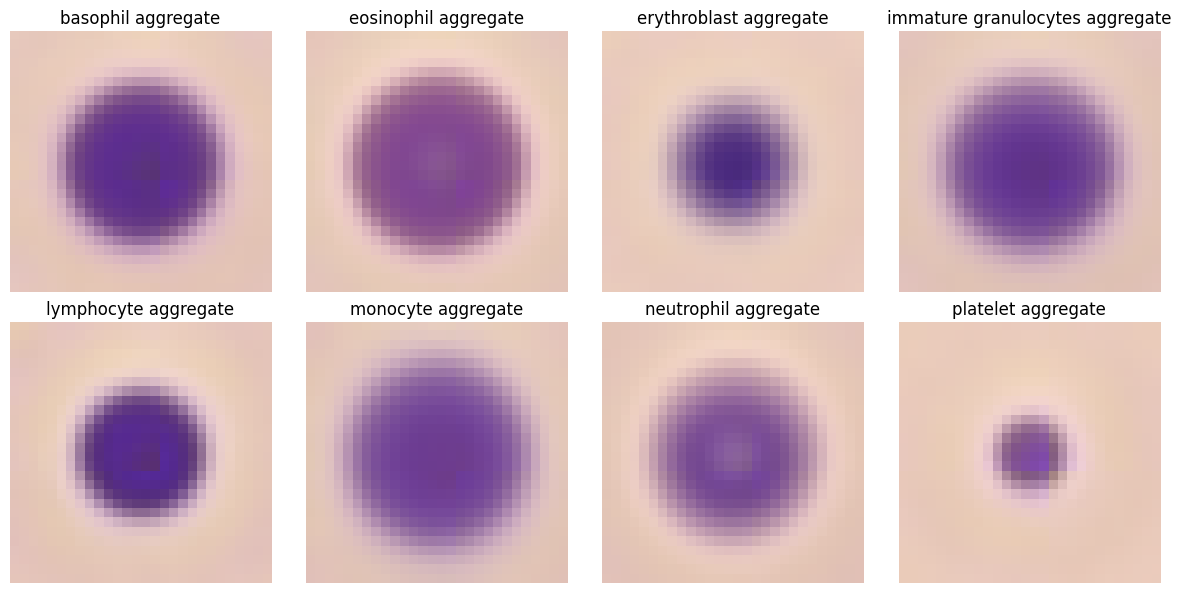

In [12]:
# plotting aggregated images for each cell class
# for 28x28x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()

In [13]:
# downloads bloodmnist_224.npz file 
# at /Users/username/.medmnist/bloodmnist_224.npz
# 224 pixel resolution
# image dimension is 224x224x3
train_df = BloodMNIST(split="train", download=True, size=224)
val_df = BloodMNIST(split="val", download=True, size=224)
test_df = BloodMNIST(split="test", download=True, size=224)

Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist_224.npz
Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist_224.npz
Using downloaded and verified file: /Users/harshi/.medmnist/bloodmnist_224.npz


In [14]:
# copy downloaded bloodmnist.npz file to current working directory
# cp -r /Users/username/.medmnist/bloodmnist_224.npz .
# load in file and check names of attributes
data = np.load("bloodmnist_224.npz")
data.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [15]:
# extracting images and labels
# train set
train_images = data["train_images"]
train_labels = data["train_labels"].flatten()

# validation_set
val_images = data["val_images"]
val_labels = data["val_labels"].flatten()

# test_set
test_images = data["test_images"]
test_labels = data["test_labels"].flatten()

In [16]:
# concatenanting all images and labels 
cat_images = np.concatenate([train_images, val_images, test_images])
cat_labels = np.concatenate([train_labels, val_labels, test_labels])

In [17]:
# creating a dictionary as label:[images]
class_dict = {k:[] for k in np.arange(8)}
for i, j in zip(cat_labels, cat_images):
    class_dict[i].append(j)

In [18]:
# calculating the average image for each class
# creating dictionary as label:avg_image
average_dict = {k:[] for k in np.arange(8)}
for i in class_dict:
    class_images = class_dict[i]
    class_all = np.stack(class_images, axis=0) 
    class_avg = np.mean(class_all, axis=0)
    average_dict[i] = class_avg

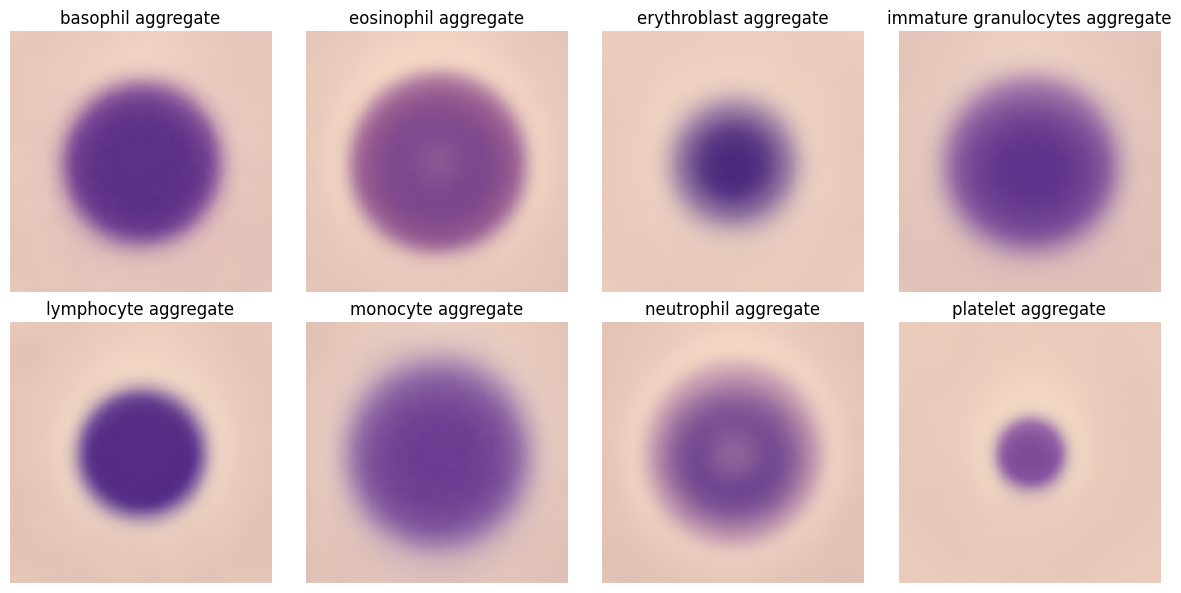

In [19]:
# plotting aggregated images for each cell class
# for 28x28x3 resolution
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    avg_image = average_dict[i]
    norm_image = avg_image/255
    ax.imshow(norm_image)  
    ax.axis('off') 
    ax.set_title(f"{label_dict[str(i)]} aggregate") 
plt.tight_layout() 
plt.show()